### 🎯 Objectif
Détecter des situations de **surconsommation énergétique cachée** en exploitant des modèles d’apprentissage non supervisé, notamment :

✅ **Isolation Forest** : pour identifier des anomalies isolées dans les données de consommation.  
✅ **DBSCAN** : pour repérer des regroupements inhabituels indiquant des comportements énergétiques atypiques.


In [1]:
import pandas as pd

# ✅ Lecture directe sans sous-chemin car le fichier est dans le même dossier que le notebook
df1 = pd.read_csv("df_final_project3.csv")

# Affichage des colonnes et des premières lignes
print(df1.columns.tolist())
df1.head()


['timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


,timestamp,ACB,BH,DB,GH,LB,LCB,SRB,working_day,activity,...,SRB_pow_kwh,GH_pow_kwh,GH_bac_pow_kwh,LCB_pow_kwh,LB_pow_kwh,DB_pow_kwh,electricity_kwh,CO2_total,temperature,humidity
0,2017-01-01 00:00:00,2,9,4,4,1,1,1,0,L,...,8.603824,8.270609,8.230579,0.0,9.389554,34.432400,351.921549,288.223748,13.1,90
1,2017-01-01 01:00:00,2,11,4,5,2,1,1,0,L,...,8.492463,9.563984,8.589677,0.0,9.392264,24.477401,372.593313,305.153923,12.7,92
2,2017-01-01 02:00:00,3,13,5,5,1,1,2,0,L,...,9.134514,10.894123,9.679417,0.0,9.538334,21.701411,372.131910,304.776034,12.3,93
3,2017-01-01 03:00:00,3,15,6,5,2,1,1,0,L,...,10.093143,9.368700,8.143238,0.0,9.275677,25.618846,388.632748,318.290220,12.1,93
4,2017-01-01 04:00:00,3,11,4,3,2,1,1,0,L,...,9.920296,7.630611,7.723895,0.0,5.831044,22.365295,371.691431,304.415282,11.8,94


In [2]:
df1['activity'] = df1['activity'].map({'L': 0, 'H': 1})


In [3]:
print(df1.columns.tolist())


['timestamp', 'ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB', 'working_day', 'activity', 'hour', 'dayofweek', 'month', 'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh', 'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh', 'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh', 'electricity_kwh', 'CO2_total', 'temperature', 'humidity']


               timestamp  electricity_kwh   CO2_total
223  2017-01-10 07:00:00       319.024781  261.281296
240  2017-01-11 00:00:00       404.644359  331.403730
241  2017-01-11 01:00:00       393.646756  322.396693
242  2017-01-11 02:00:00       401.026598  328.440783
245  2017-01-11 05:00:00       343.876426  281.634792
...                  ...              ...         ...
6913 2017-10-16 01:00:00       240.085992  196.630428
7299 2017-11-01 03:00:00       168.574749  138.062719
7301 2017-11-01 05:00:00       173.925079  142.444640
7325 2017-11-02 05:00:00       169.356231  138.702753
7326 2017-11-02 06:00:00       179.484548  146.997844

[368 rows x 3 columns]


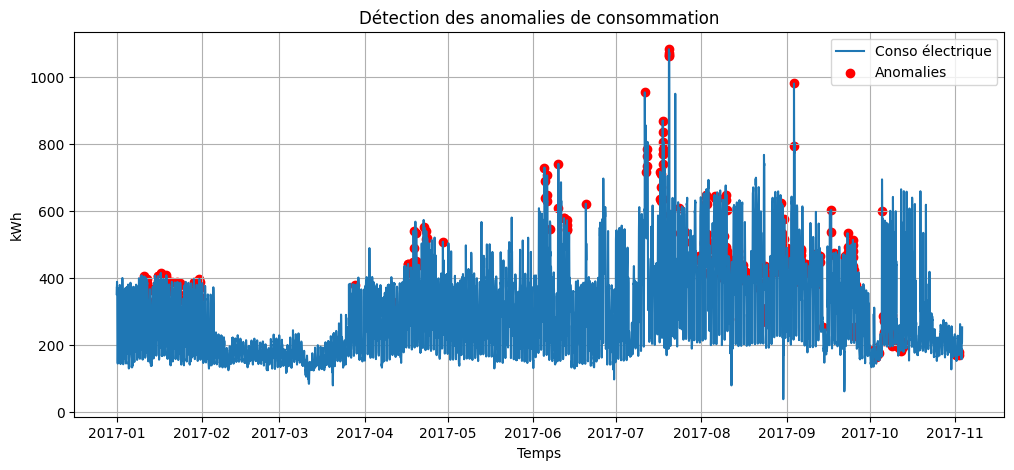

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement

df1['timestamp'] = pd.to_datetime(df1['timestamp'])

# Features utilisées
features = ['ACB', 'BH', 'DB', 'GH', 'LB', 'LCB', 'SRB',
            'working_day', 'activity', 'hour', 'dayofweek', 'month',
            'transfomer_1_kwh', 'transfomer_2_kwh', 'transfomer_3_kwh',
            'BH_pow_kwh', 'BH_bac_pow_kwh', 'SRB_pow_kwh', 'GH_pow_kwh',
            'GH_bac_pow_kwh', 'LCB_pow_kwh', 'LB_pow_kwh', 'DB_pow_kwh',
            'electricity_kwh', 'CO2_total', 'temperature', 'humidity']

# Nettoyage et normalisation
df_clean = df1.dropna(subset=features)
X = df_clean[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_clean['anomaly'] = model.fit_predict(X_scaled)
df_clean['anomaly'] = df_clean['anomaly'].map({1: 0, -1: 1})

# Résultats
anomalies = df_clean[df_clean['anomaly'] == 1]
print(anomalies[['timestamp', 'electricity_kwh', 'CO2_total']])
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_clean['timestamp'], df_clean['electricity_kwh'], label="Conso électrique")
plt.scatter(anomalies['timestamp'], anomalies['electricity_kwh'], color='red', label='Anomalies')
plt.xlabel("Temps")
plt.ylabel("kWh")
plt.title("Détection des anomalies de consommation")
plt.legend()
plt.grid()
plt.show()


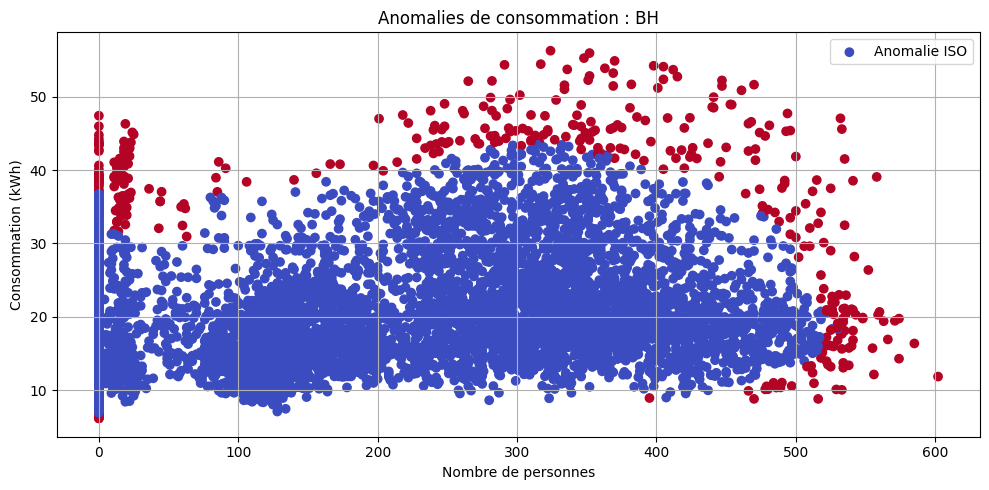

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Charger les données

# 2. Choisir un bâtiment (ex. BH)
batiment = "BH"
conso = "BH_pow_kwh"

# 3. Sélectionner les features : nombre de personnes + conso
X = df1[[batiment, conso]].copy()

# 4. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Isolation Forest
iso_model = IsolationForest(contamination=0.05, random_state=42)
df1[f"{batiment}_anomaly_iso"] = iso_model.fit_predict(X_scaled)  # -1 = anomalie

# 6. DBSCAN
db_model = DBSCAN(eps=1.5, min_samples=10)
df1[f"{batiment}_anomaly_dbscan"] = db_model.fit_predict(X_scaled)  # -1 = anomalie

# 7. Visualisation
plt.figure(figsize=(10,5))
plt.scatter(df1[batiment], df1[conso], c=(df1[f"{batiment}_anomaly_iso"] == -1), cmap='coolwarm', label="Anomalie ISO")
plt.xlabel("Nombre de personnes")
plt.ylabel("Consommation (kWh)")
plt.title(f"Anomalies de consommation : {batiment}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
n_total = len(df1)
n_anomalies = (df1[f"{batiment}_anomaly_iso"] == -1).sum()
pourcentage = 100 * n_anomalies / n_total

print(f"Nombre total de points : {n_total}")
print(f"Nombre d’anomalies détectées : {n_anomalies} ({pourcentage:.2f} %)")

Nombre total de points : 7357
Nombre d’anomalies détectées : 368 (5.00 %)


In [20]:
anomalies = df1[df1[f"{batiment}_anomaly_iso"] == -1]

print("🔴 Moyenne consommation anomalies :", anomalies[conso].mean())
print("🔴 Moyenne nombre de personnes :", round(anomalies[batiment].mean(), 0))
print("🔴 Jours avec le plus d'anomalies :")
print(anomalies['dayofweek'].value_counts())

🔴 Moyenne consommation anomalies : 27.258804640851448
🔴 Moyenne nombre de personnes : 306.0
🔴 Jours avec le plus d'anomalies :
dayofweek
1    87
0    76
6    57
2    56
3    35
4    30
5    27
Name: count, dtype: int64


In [10]:
# Anomalies ISO Forest pour BH uniquement
df_bh_anomalies = df1[df1['BH_anomaly_iso'] == -1][
    ['timestamp', 'BH', 'BH_pow_kwh', 'hour', 'dayofweek', 'month', 'working_day']
].copy()


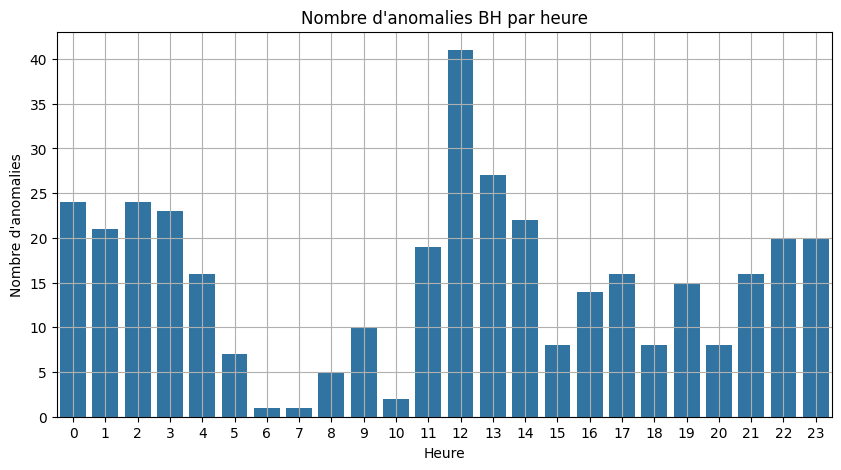

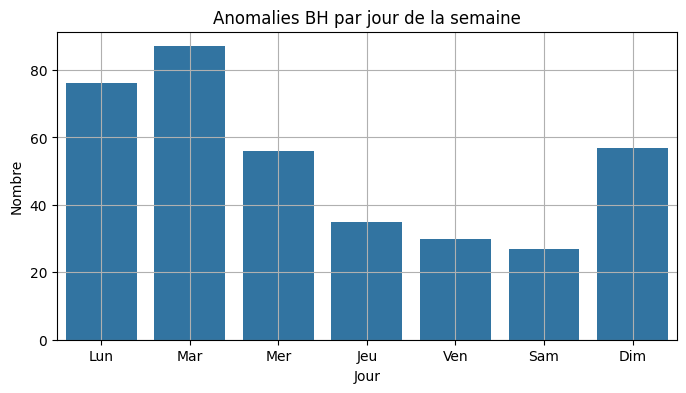

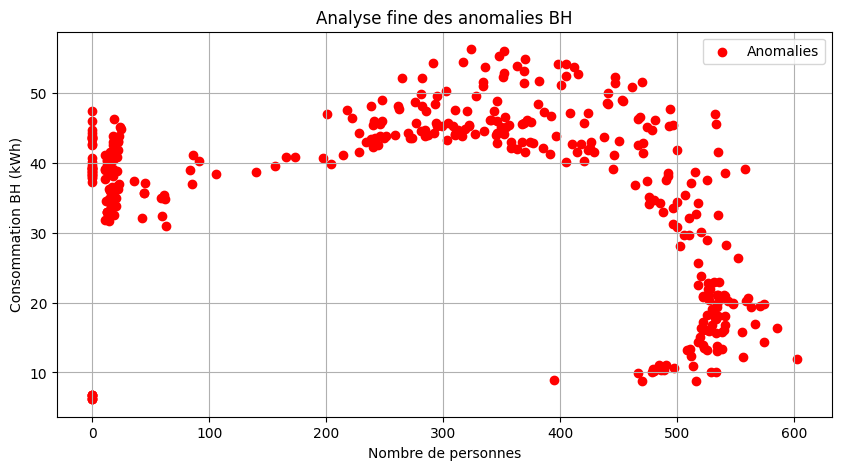

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df_bh_anomalies, x='hour')
plt.title("Nombre d'anomalies BH par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre d'anomalies")
plt.grid(True)
plt.show()
jours = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
df_bh_anomalies['dayofweek'] = df_bh_anomalies['dayofweek'].map(dict(zip(range(7), jours)))

plt.figure(figsize=(8,4))
sns.countplot(data=df_bh_anomalies, x='dayofweek', order=jours)
plt.title("Anomalies BH par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Nombre")
plt.grid(True)
plt.show()
plt.figure(figsize=(10,5))
plt.scatter(df_bh_anomalies['BH'], df_bh_anomalies['BH_pow_kwh'], c='red', label='Anomalies')
plt.xlabel("Nombre de personnes")
plt.ylabel("Consommation BH (kWh)")
plt.title("Analyse fine des anomalies BH")
plt.grid(True)
plt.legend()
plt.show()


🔍 Analyse du bâtiment : BH


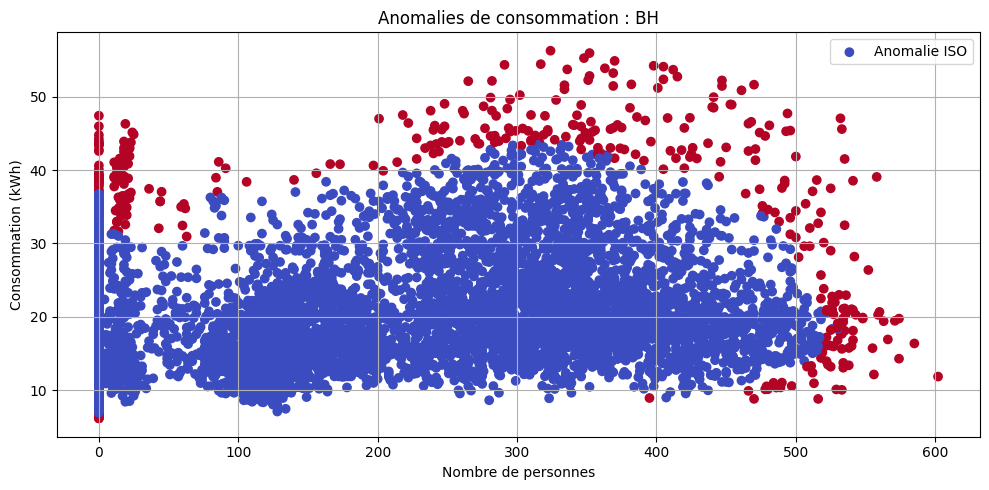

⚠️ Colonnes manquantes pour BH_bac → ignoré.
🔍 Analyse du bâtiment : SRB


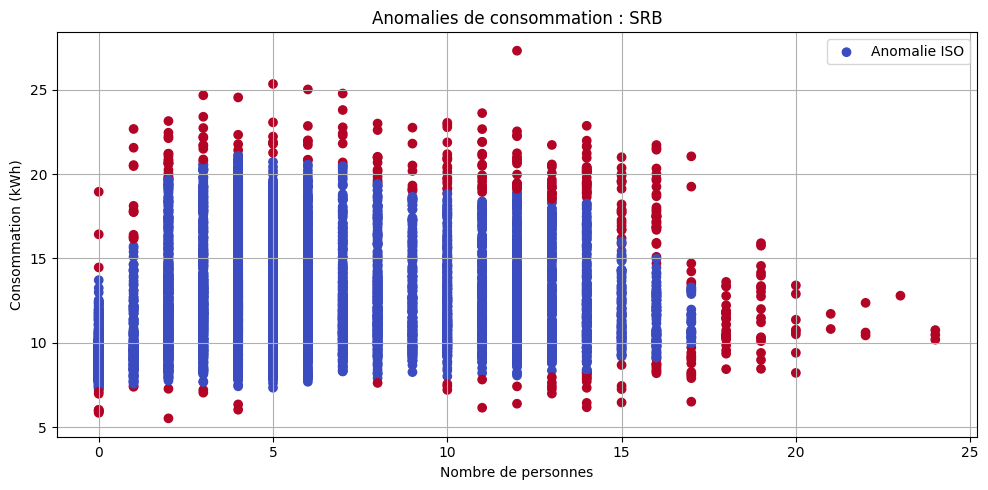

🔍 Analyse du bâtiment : GH


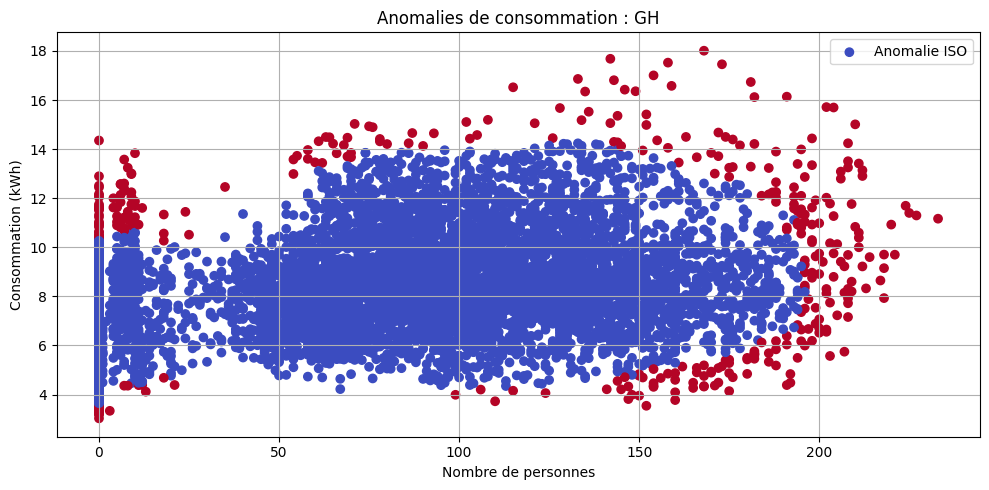

⚠️ Colonnes manquantes pour GH_bac → ignoré.
🔍 Analyse du bâtiment : LCB


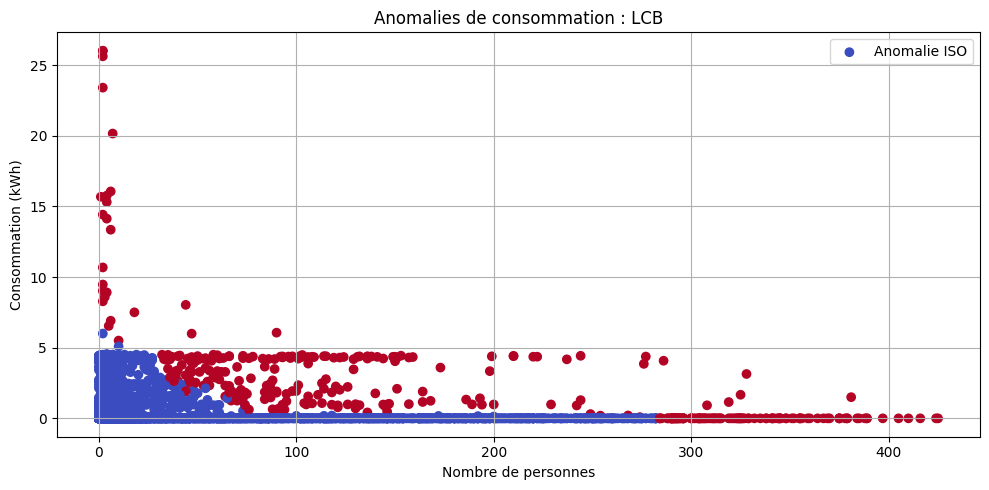

🔍 Analyse du bâtiment : LB


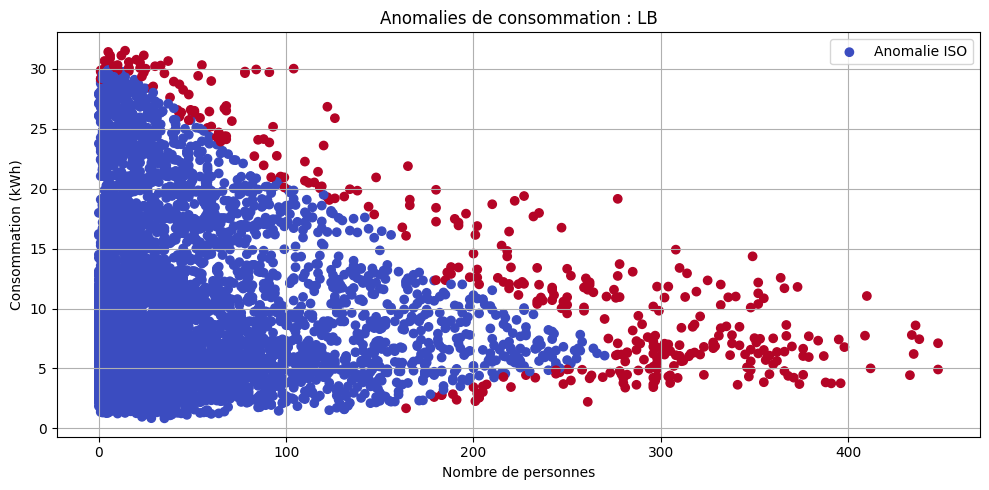

🔍 Analyse du bâtiment : DB


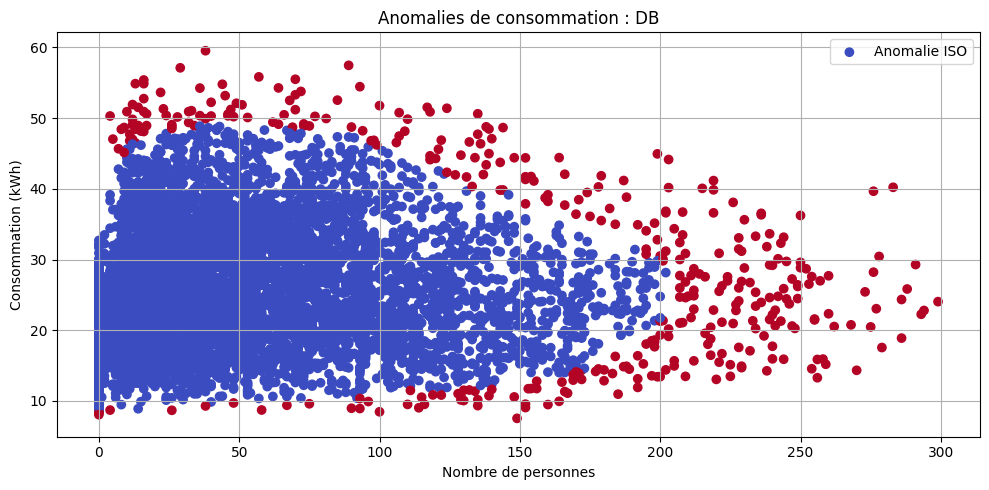

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# 1. Chargement du dataset (tu dois adapter cette ligne)
# df1 = pd.read_csv("ton_fichier.csv", parse_dates=["timestamp"])
# df1.fillna(method='ffill', inplace=True)

# 2. Liste des bâtiments à analyser
batiments = ["BH", "BH_bac", "SRB", "GH",
            "GH_bac", "LCB", "LB", "DB"]

# 3. Boucle sur chaque bâtiment
for bat in batiments:
    conso = f"{bat}_pow_kwh"
    
    if bat in df1.columns and conso in df1.columns:
        print(f"🔍 Analyse du bâtiment : {bat}")
        
        # 3.1 Sélection des features
        X = df1[[bat, conso]].copy()
        
        # 3.2 Normalisation
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # 3.3 Isolation Forest
        iso_model = IsolationForest(contamination=0.05, random_state=42)
        df1[f"{bat}_anomaly_iso"] = iso_model.fit_predict(X_scaled)
        
        # 3.4 DBSCAN
        db_model = DBSCAN(eps=1.5, min_samples=10)
        df1[f"{bat}_anomaly_dbscan"] = db_model.fit_predict(X_scaled)
        
        # 3.5 Visualisation
        plt.figure(figsize=(10, 5))
        plt.scatter(df1[bat], df1[conso], c=(df1[f"{bat}_anomaly_iso"] == -1),
                    cmap='coolwarm', label="Anomalie ISO")
        plt.xlabel("Nombre de personnes")
        plt.ylabel("Consommation (kWh)")
        plt.title(f"Anomalies de consommation : {bat}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"⚠️ Colonnes manquantes pour {bat} → ignoré.")
